In [72]:
import numpy as np
import matplotlib.pyplot as plt

import pywt

from jlinops import _CustomLinearOperator
import jlinops

In [151]:
class Wavelet1DOperator(_CustomLinearOperator):
    """Represents a 1D wavelet operator extracting both approximation and detail coefficients.
    Can only handle even-shaped inputs for now.
    """
    def __init__(self, in_shape, wavelet='db1', mode='symmetric'):
        
        self.wavelet = wavelet
        self.mode = mode
        device = "cpu"
        

        def _matvec(x):

            # Perform forward wavelet transform
            cA, cD = pywt.dwt(x, "db1")

            # Flatten the coefficients
            return np.hstack([cA, cD])
        
        out_shape = len(_matvec(np.ones(in_shape)))
        coeff_len = pywt.dwt_coeff_len(in_shape, pywt.Wavelet(self.wavelet), mode=self.mode)
        print(out_shape)
        
        def _rmatvec(x):

            cA, cD = x[:coeff_len], x[coeff_len:]

            return pywt.idwt(cA, cD, wavelet=self.wavelet, mode=self.mode)

        
        shape = (out_shape, in_shape)

            
        super().__init__( shape, _matvec, _rmatvec, device=device, dtype=np.float64)

In [152]:
W = Wavelet1DOperator(10, wavelet='db1', mode='periodization')

10


In [154]:
W.rmatvec( W @ np.ones(10) )

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [155]:
jlinops.check_adjoint(W)

True

In [163]:
W = Wavelet1DOperator(100, wavelet='db1', mode='periodization')

100


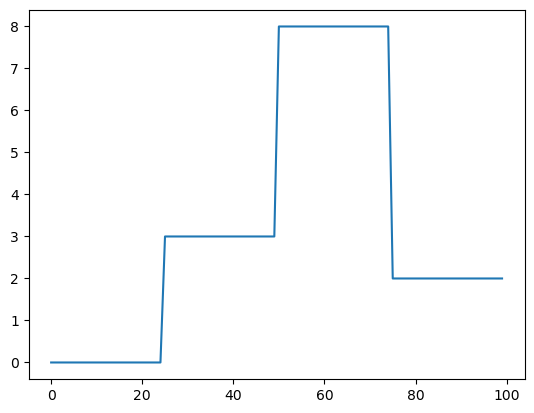

In [164]:
z = np.zeros(100)
z[25:] += 3
z[50:] += 5
z[75:] -= 6

plt.plot(z)
plt.show()

In [165]:
W @ z

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  2.12132034,  4.24264069,  4.24264069,
        4.24264069,  4.24264069,  4.24264069,  4.24264069,  4.24264069,
        4.24264069,  4.24264069,  4.24264069,  4.24264069,  4.24264069,
       11.3137085 , 11.3137085 , 11.3137085 , 11.3137085 , 11.3137085 ,
       11.3137085 , 11.3137085 , 11.3137085 , 11.3137085 , 11.3137085 ,
       11.3137085 , 11.3137085 ,  7.07106781,  2.82842712,  2.82842712,
        2.82842712,  2.82842712,  2.82842712,  2.82842712,  2.82842712,
        2.82842712,  2.82842712,  2.82842712,  2.82842712,  2.82842712,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -2.12132034,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

# Now just the detail coefficients

In [156]:
class WaveletDetail1DOperator(_CustomLinearOperator):
    """Represents a 1D wavelet operator extracting only the detail coefficients.
    Can only handle even-shaped inputs for now.
    """

    def __init__(self, in_shape, wavelet='db1', mode='symmetric'):
        
        self.wavelet = wavelet
        self.mode = mode
        device = "cpu"
        

        def _matvec(x):

            # Perform forward wavelet transform
            cA, cD = pywt.dwt(x, "db1")

            # Flatten the coefficients
            return cD
        
        out_shape = len(_matvec(np.ones(in_shape)))
        
        def _rmatvec(x):


            return pywt.idwt(None, x, wavelet=self.wavelet, mode=self.mode)

        
        shape = (out_shape, in_shape)

            
        super().__init__( shape, _matvec, _rmatvec, device=device, dtype=np.float64)

In [157]:
W = WaveletDetail1DOperator(10, wavelet='db1', mode='periodization')

In [158]:
W.rmatvec( W @ np.ones(10) )

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [159]:
jlinops.check_adjoint(W)

True

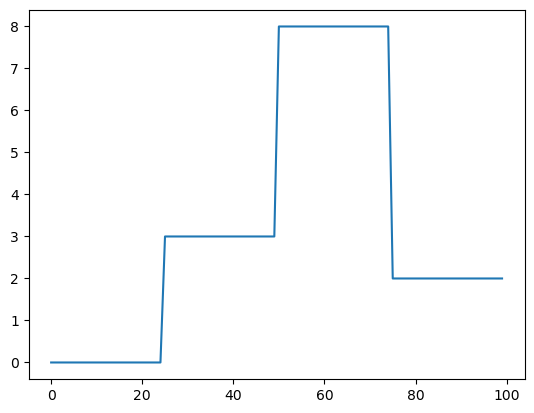

In [160]:
z = np.zeros(100)
z[25:] += 3
z[50:] += 5
z[75:] -= 6

plt.plot(z)
plt.show()

In [149]:
W = WaveletDetail1DOperator(100, wavelet='db1', mode='periodization')

In [150]:
W @ z

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -2.12132034,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  4.24264069,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

# Multilevel 1D?